In [24]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import os
import re

print("Pandas version: {}".format(pd.__version__))
print("NumPy version: {}".format(np.__version__))

Pandas version: 2.2.3
NumPy version: 2.1.1


## Functions

In [20]:
# Function to parse iftop log file
def parse_iftop_log(log_file):
    with open(log_file, 'r') as file:
        lines = file.readlines()

    # Regular expressions to match the total send and receive rates
    send_pattern = re.compile(r'Total send rate:\s+([0-9.]+[KMGb]+)\s+([0-9.]+[KMGb]+)\s+([0-9.]+[KMGb]+)')
    receive_pattern = re.compile(r'Total receive rate:\s+([0-9.]+[KMGb]+)\s+([0-9.]+[KMGb]+)\s+([0-9.]+[KMGb]+)')
    time_pattern = re.compile(r'Listening on')

    timestamps = []
    send_rates = []
    receive_rates = []

    current_time = 0
    for line in lines:
        if time_pattern.search(line):
            current_time += 10
        send_match = send_pattern.search(line)
        if send_match:
            send_rate = send_match.group(2)
            send_rates.append(convert_to_bps(send_rate))
            timestamps.append(current_time)

        receive_match = receive_pattern.search(line)
        if receive_match:
            receive_rate = receive_match.group(2)
            receive_rates.append(convert_to_bps(receive_rate))

    return timestamps, send_rates, receive_rates

# Function to convert traffic rates to bits per second
def convert_to_bps(rate):
    match = re.match(r"([0-9.]+)([a-zA-Z]+)", rate)
    if not match:
        raise ValueError(f"Invalid rate format: {rate}")
    
    value, unit = match.groups()
    value = float(value)
    
    if unit == 'b':
        return value
    elif unit == 'Kb':
        return value * 1e3
    elif unit == 'Mb':
        return value * 1e6
    elif unit == 'Gb':
        return value * 1e9
    elif unit == 'Tb':
        return value * 1e12
    else:
        raise ValueError(f"Unrecognized unit: {unit}")
    
# Formatter function to convert seconds to hh:mm:ss format
def seconds_to_hhmmss(x, pos):
    hrs, rem = divmod(x, 3600)
    mins, secs = divmod(rem, 60)
    return f'{int(hrs):02}:{int(mins):02}:{int(secs):02}'

In [21]:
def plot_throughput_over_time(path):
    # Parse the log file
    timestamps, send_rates, receive_rates = parse_iftop_log(path)

    # Create a DataFrame
    df = pd.DataFrame({
        'Time': timestamps,
        'Send Rate (bps)': send_rates,
        'Receive Rate (bps)': receive_rates
    })

    # Plot the data
    plt.figure(figsize=(10, 5))
    # plt.plot(df['Time'], df['Send Rate (bps)'], label='Send Rate')
    plt.plot(df['Time'], df['Receive Rate (bps)']/1e6, '.-', label='Receive Rate')
    plt.xlabel('Time')
    plt.ylabel('Mbps')
    plt.title('Throughput Over Time')
    # plt.legend()


    # Set x-axis formatter to display time in hh:mm:ss
    formatter = FuncFormatter(seconds_to_hhmmss)
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    avg_receive_rates = sum(receive_rates)/len(receive_rates)
    print(f"Average Receive Rate: {avg_receive_rates/1e6:.2f} Mbps")

In [16]:
data_dir = '/mnt/d/RustiFlow/scanning-lab'

node0


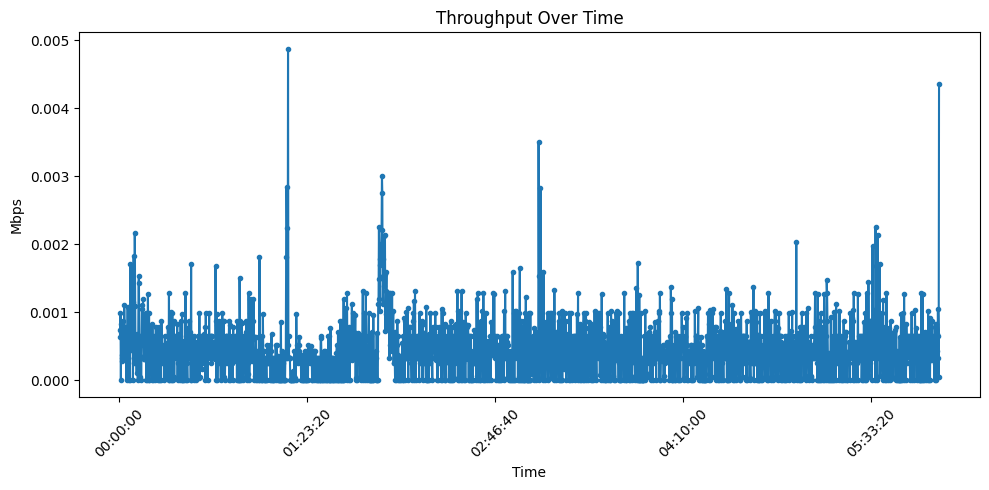

Average Receive Rate: 0.00 Mbps
node1


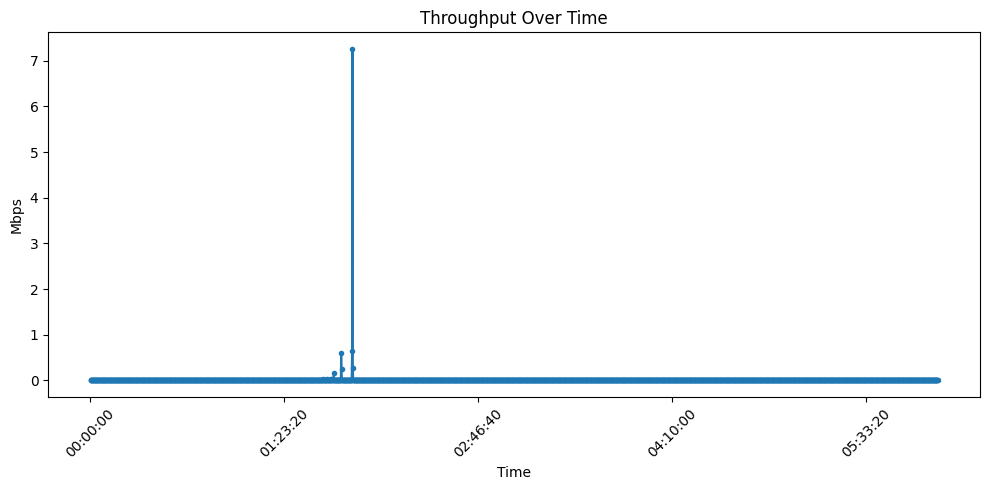

Average Receive Rate: 0.00 Mbps
node10


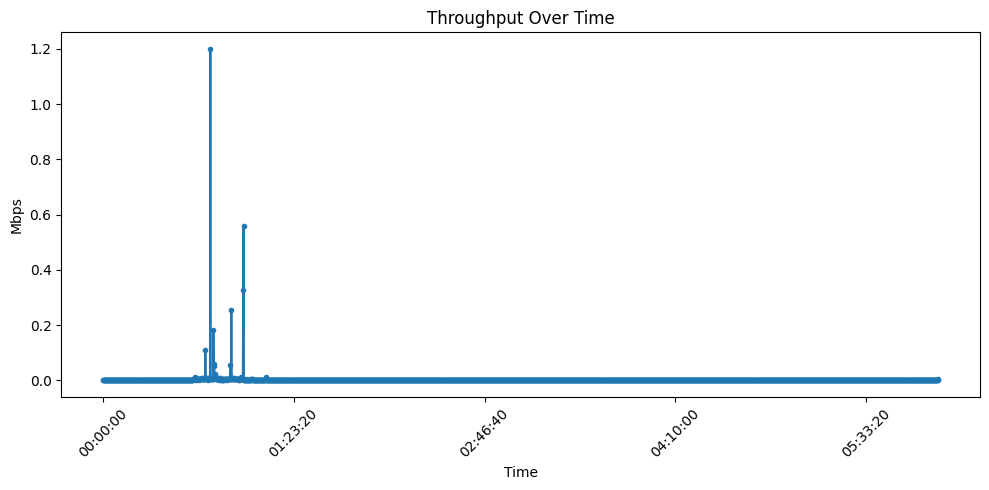

Average Receive Rate: 0.00 Mbps
node11


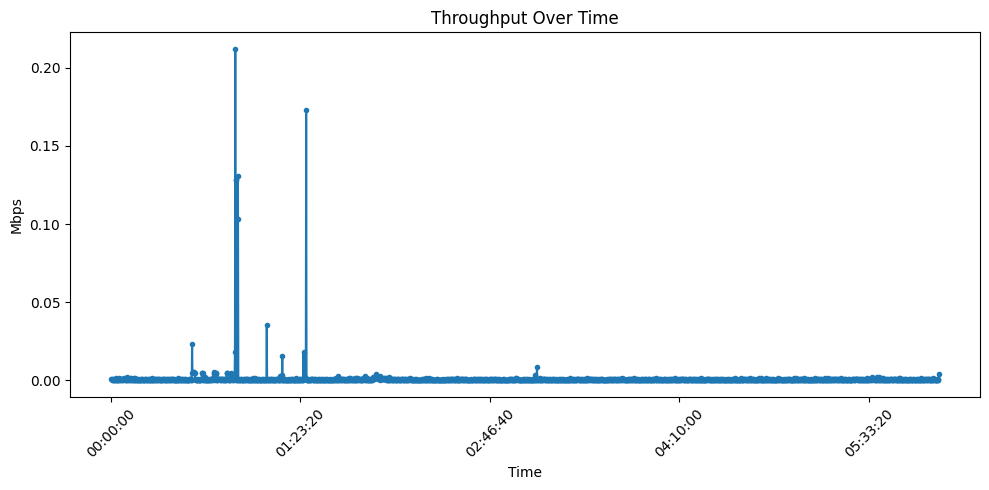

Average Receive Rate: 0.00 Mbps
node12


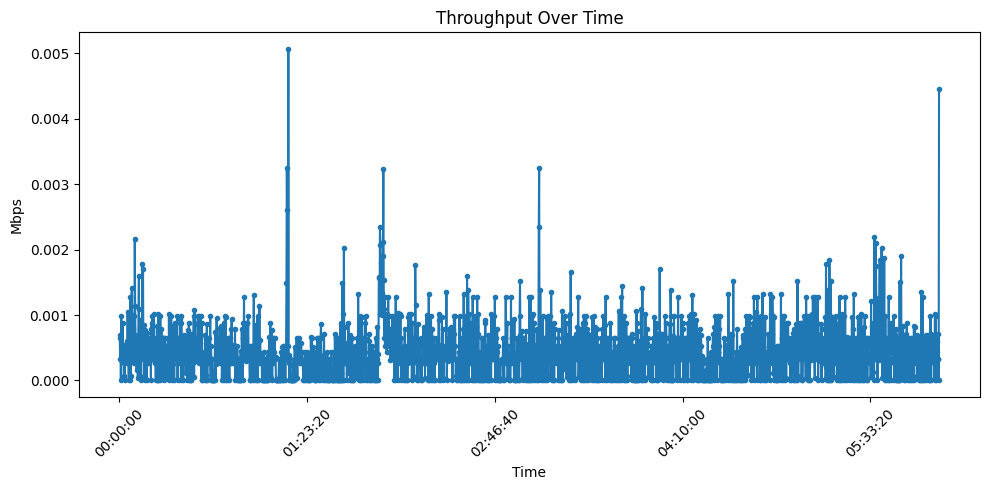

Average Receive Rate: 0.00 Mbps
node13


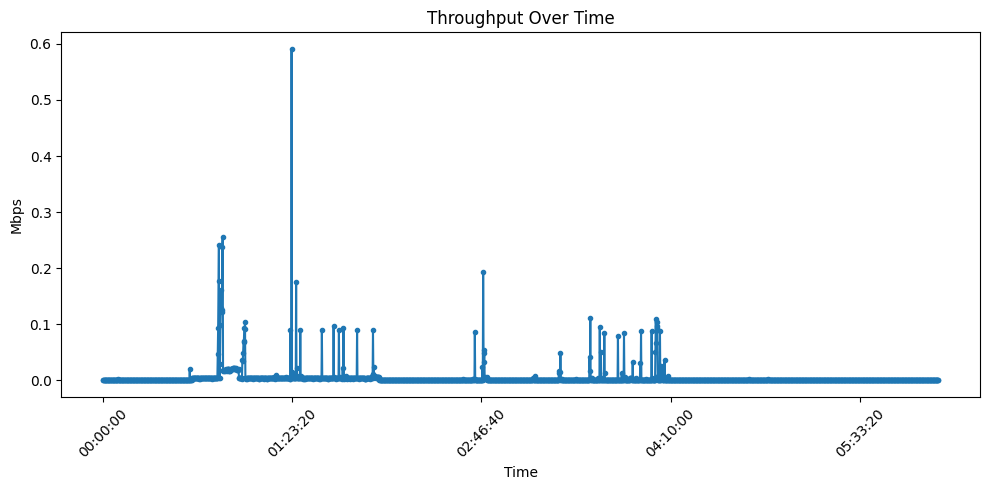

Average Receive Rate: 0.00 Mbps
node14


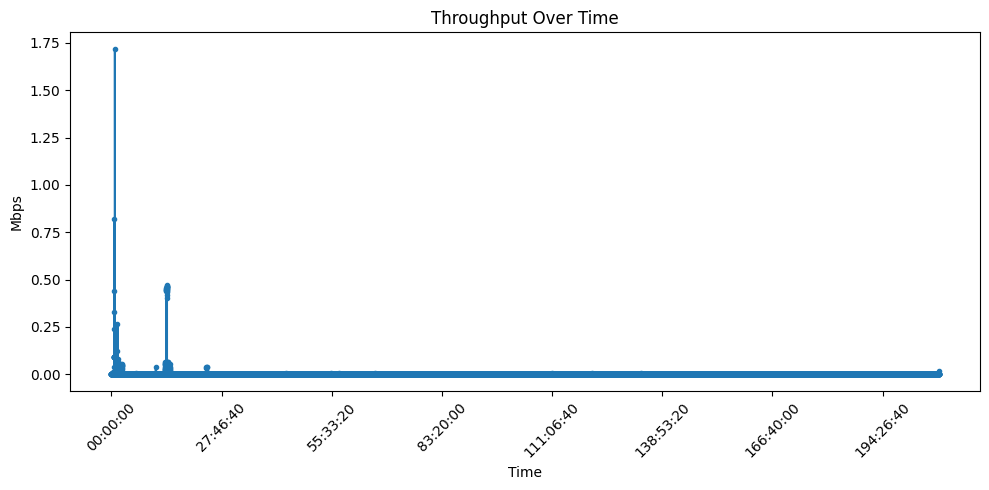

Average Receive Rate: 0.00 Mbps
node15


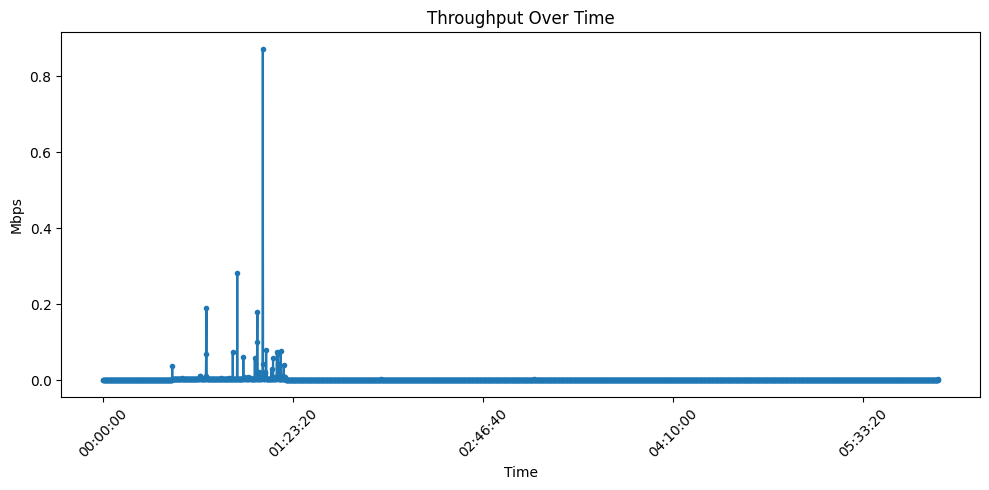

Average Receive Rate: 0.00 Mbps
node16


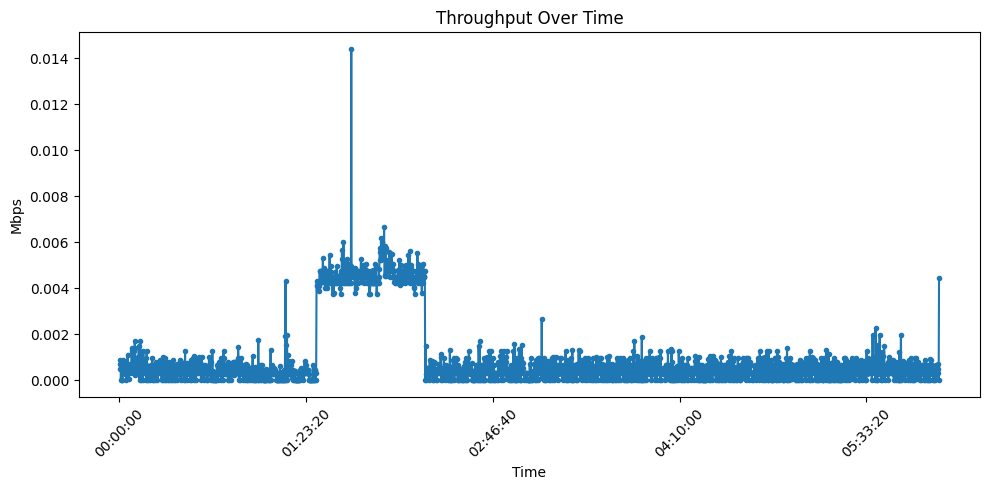

Average Receive Rate: 0.00 Mbps
node17


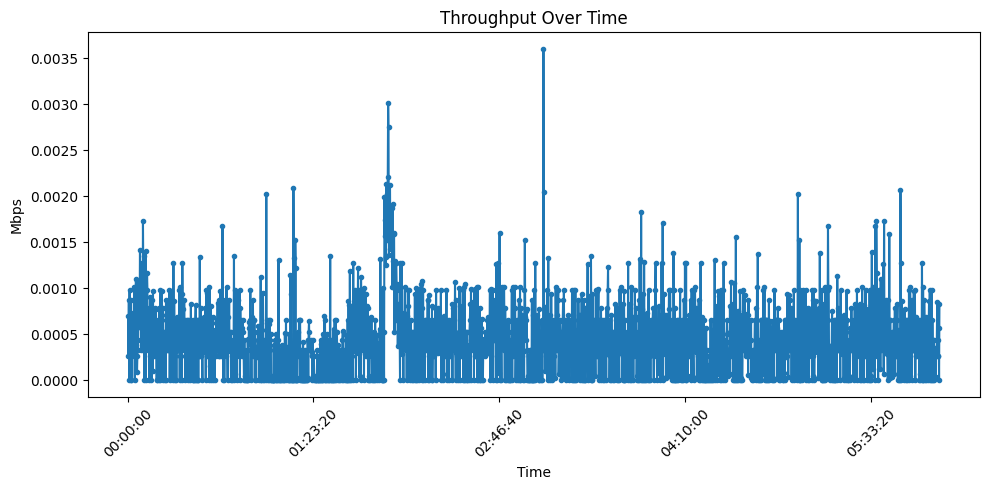

Average Receive Rate: 0.00 Mbps
node18


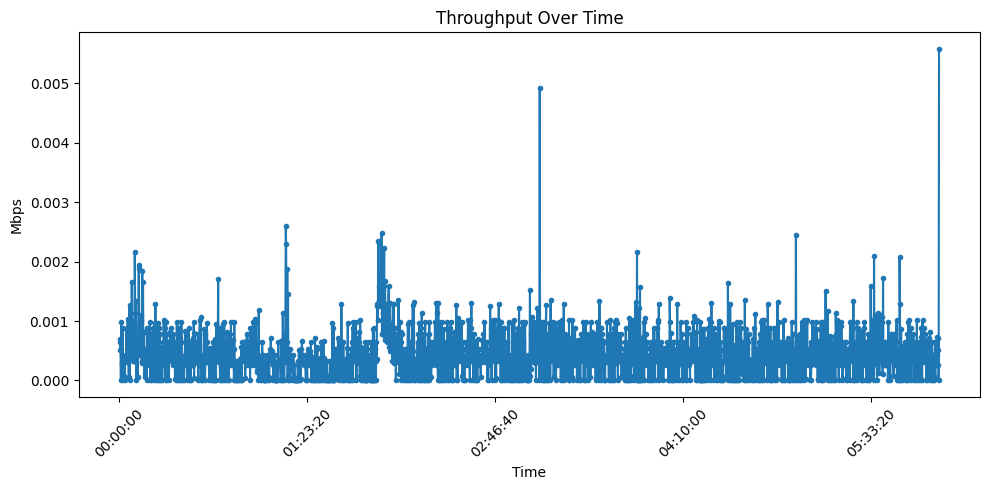

Average Receive Rate: 0.00 Mbps
node19


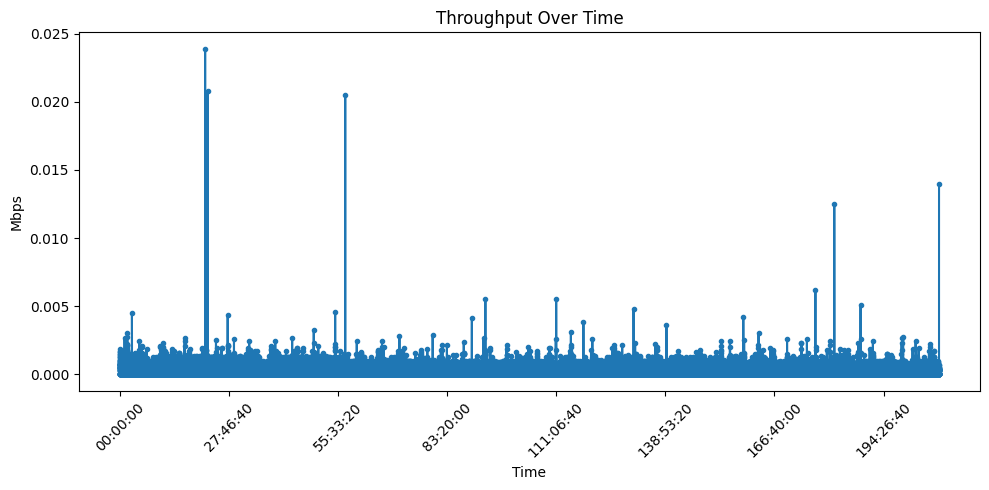

Average Receive Rate: 0.00 Mbps
node2


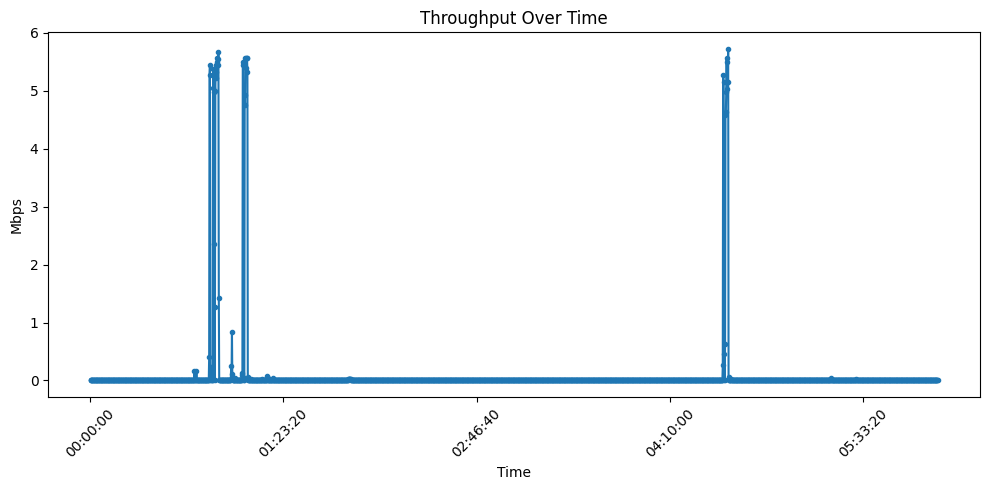

Average Receive Rate: 0.09 Mbps
node20


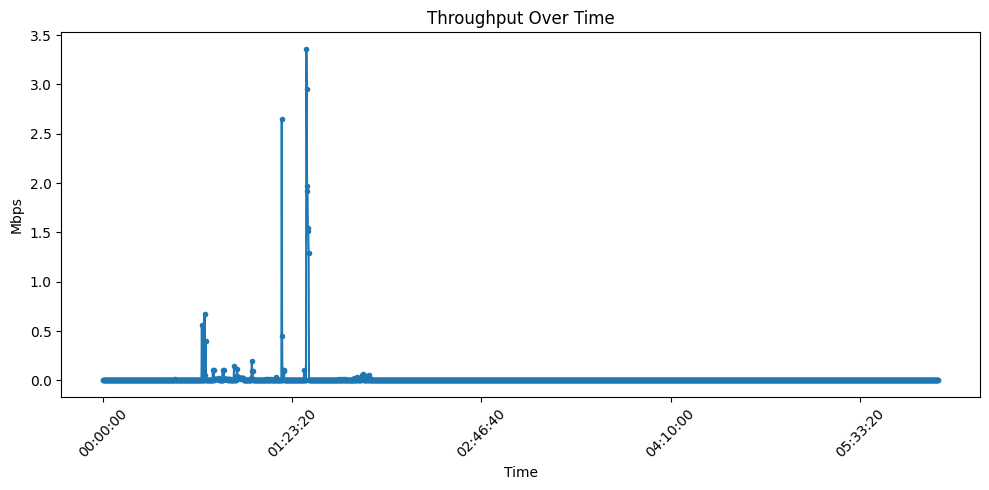

Average Receive Rate: 0.01 Mbps
node21


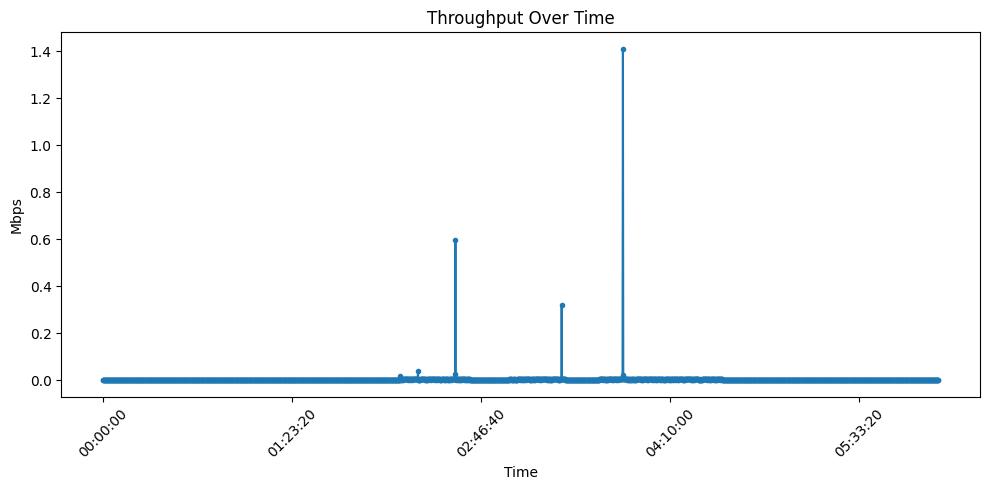

Average Receive Rate: 0.00 Mbps
node22


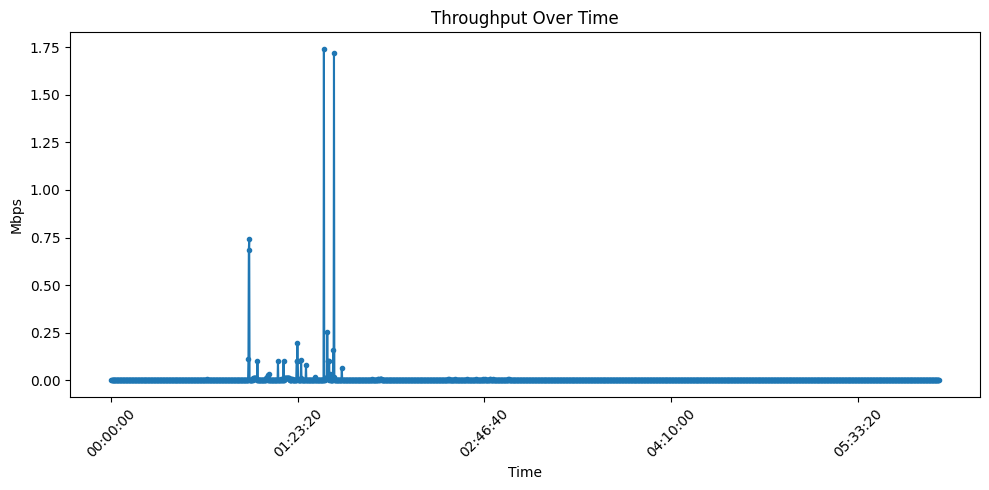

Average Receive Rate: 0.00 Mbps
node23


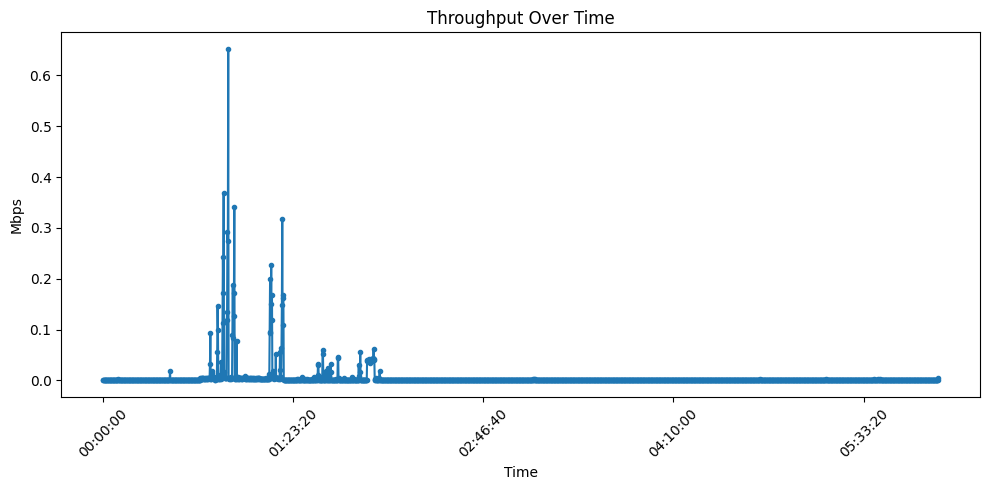

Average Receive Rate: 0.00 Mbps
node24


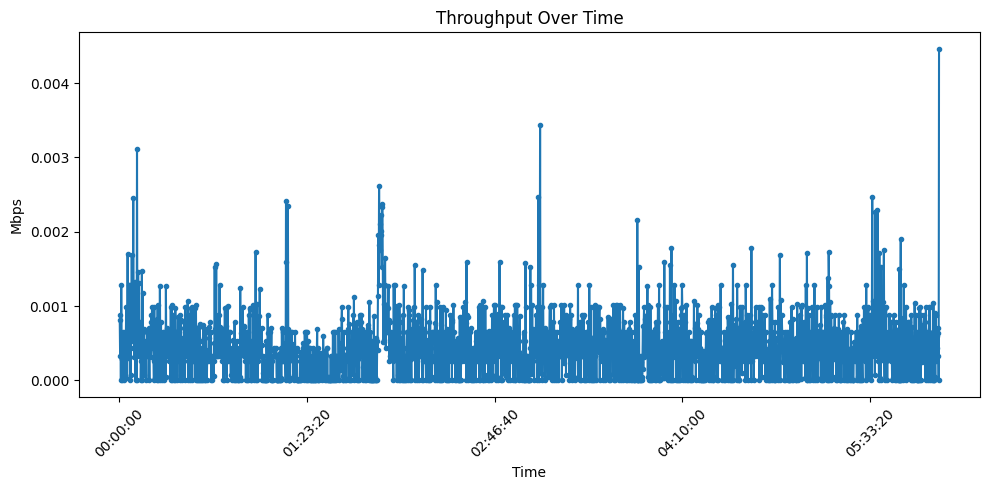

Average Receive Rate: 0.00 Mbps
node3


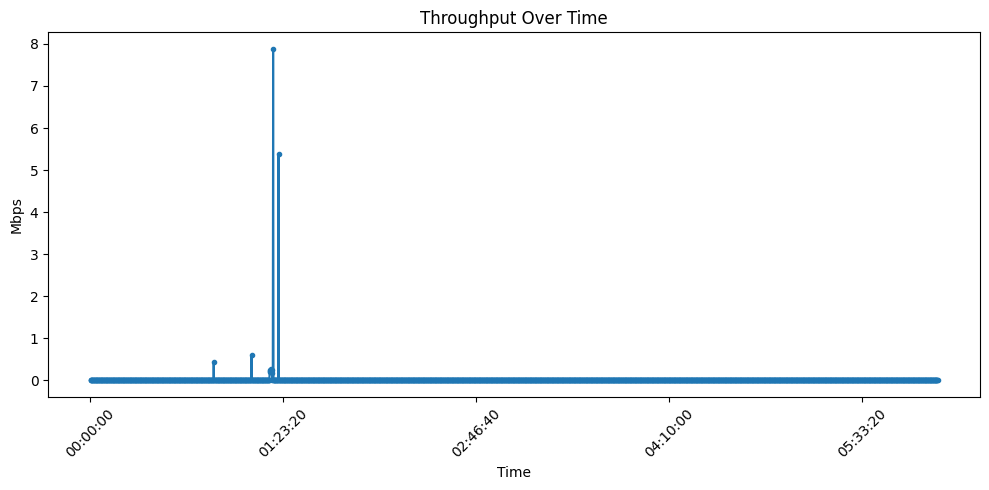

Average Receive Rate: 0.01 Mbps
node4


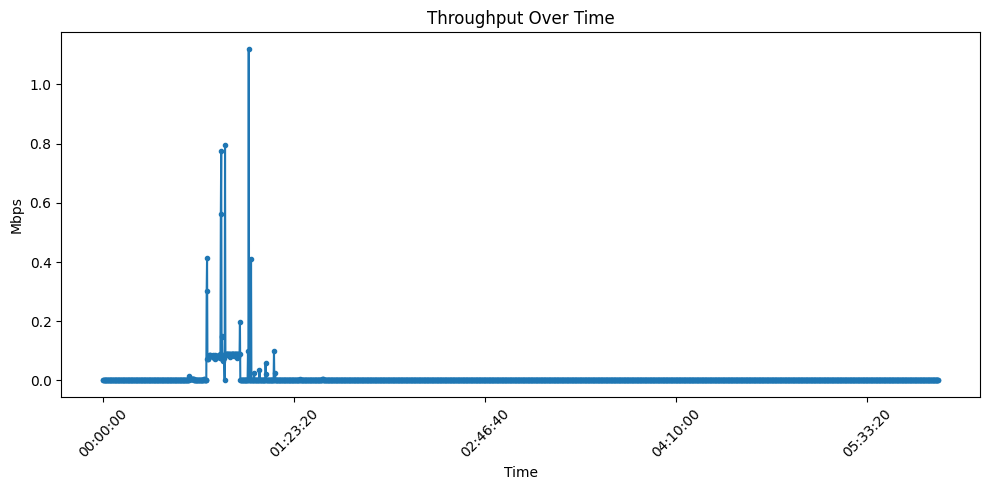

Average Receive Rate: 0.01 Mbps
node5


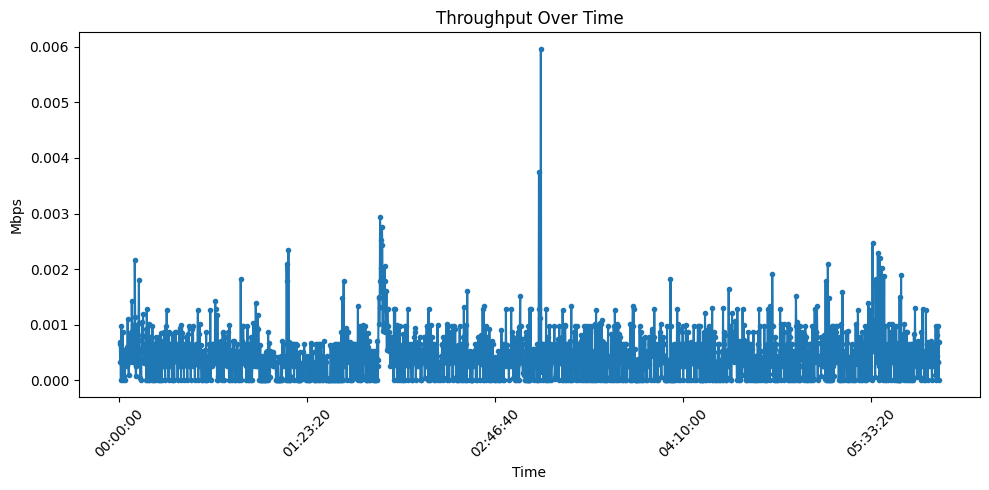

Average Receive Rate: 0.00 Mbps
node6


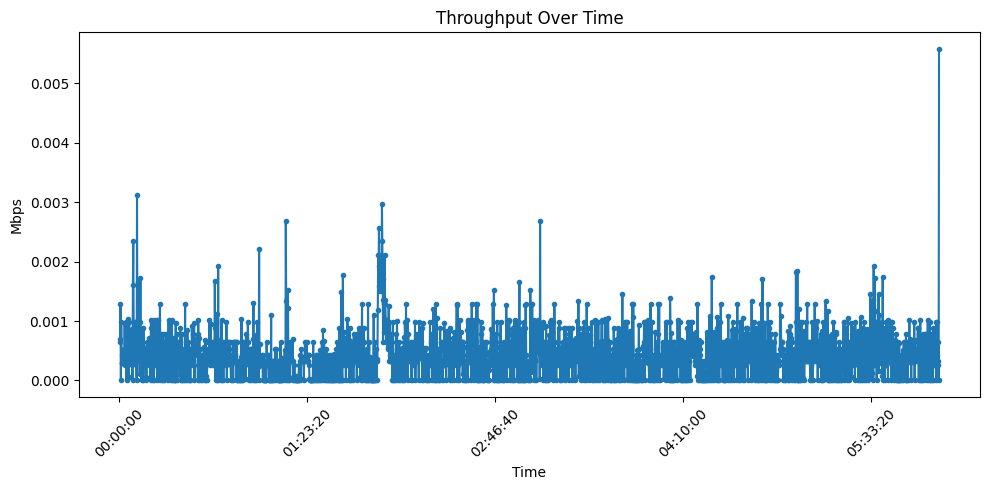

Average Receive Rate: 0.00 Mbps
node7


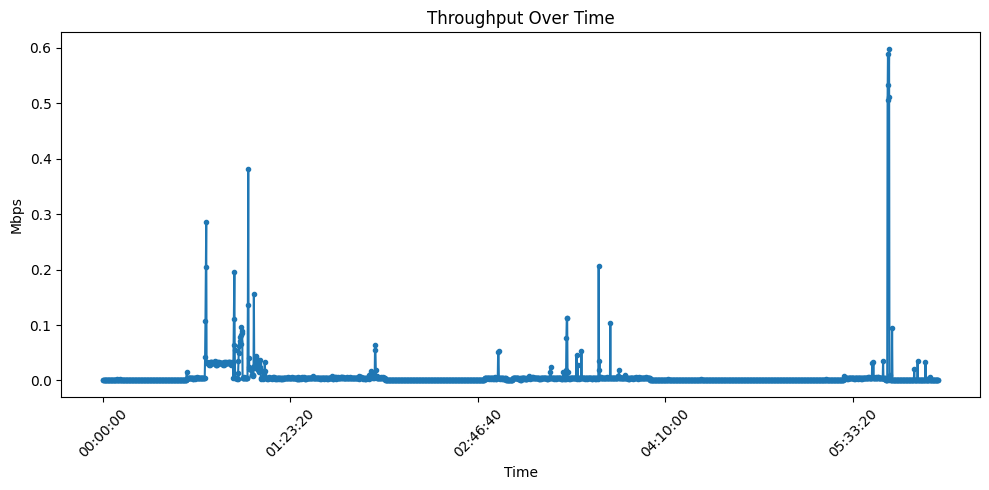

Average Receive Rate: 0.01 Mbps
node8


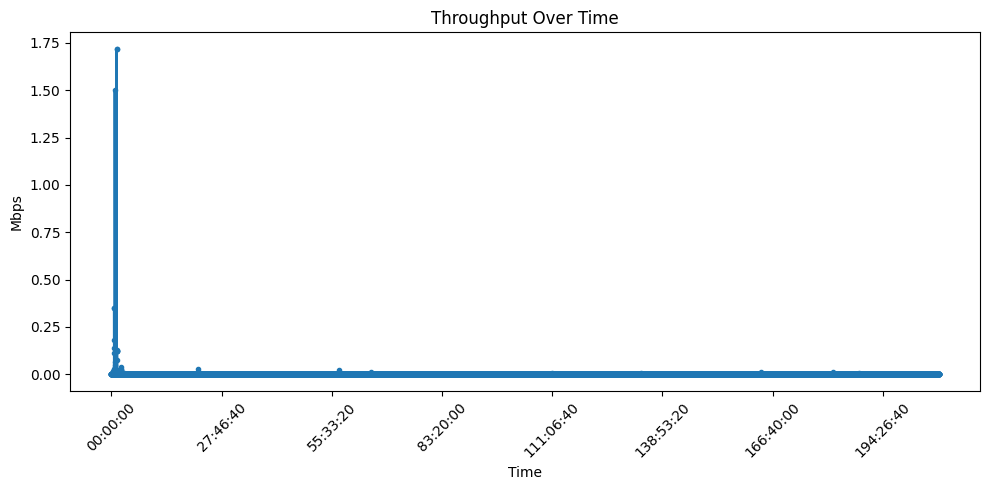

Average Receive Rate: 0.00 Mbps
node9


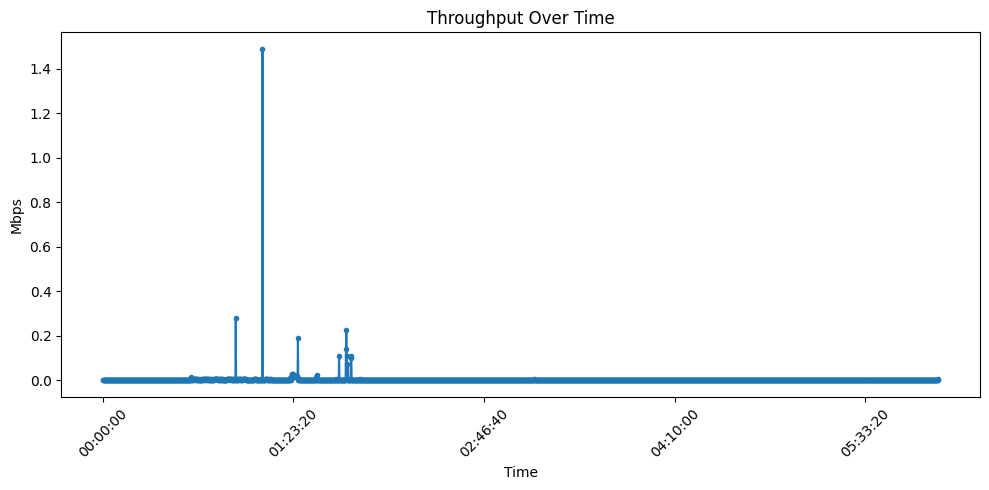

Average Receive Rate: 0.00 Mbps
node0


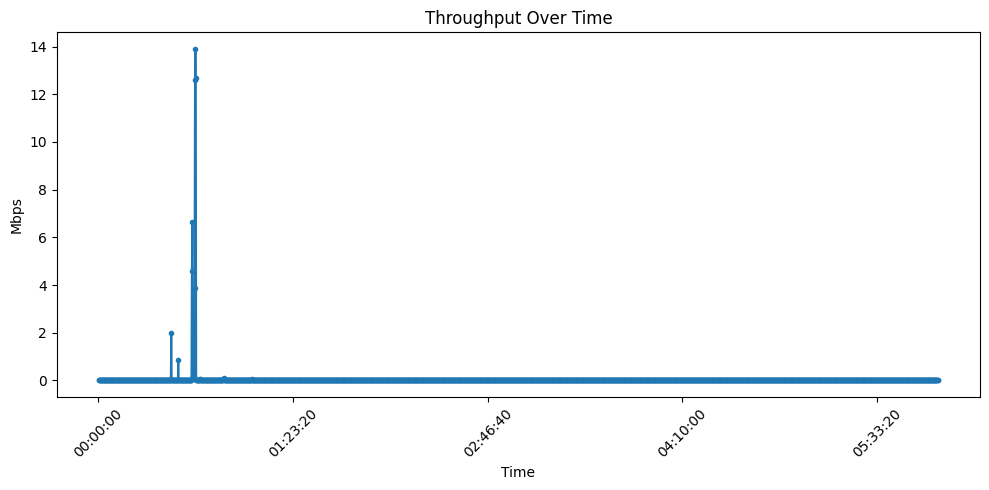

Average Receive Rate: 0.03 Mbps
node1


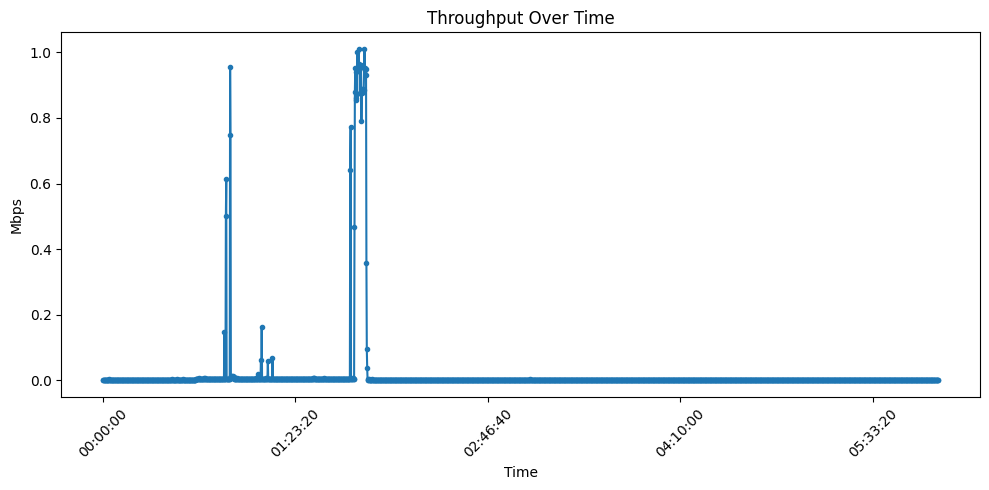

Average Receive Rate: 0.02 Mbps
node10


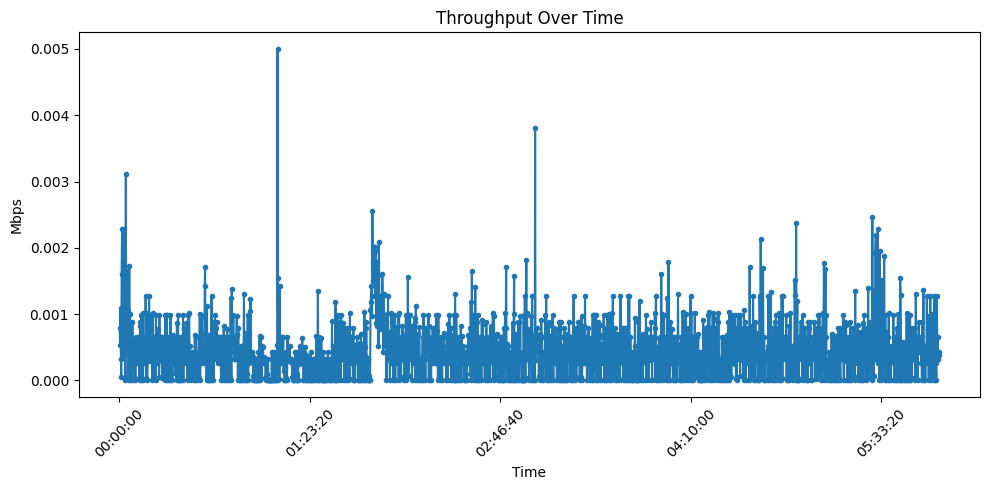

Average Receive Rate: 0.00 Mbps
node11


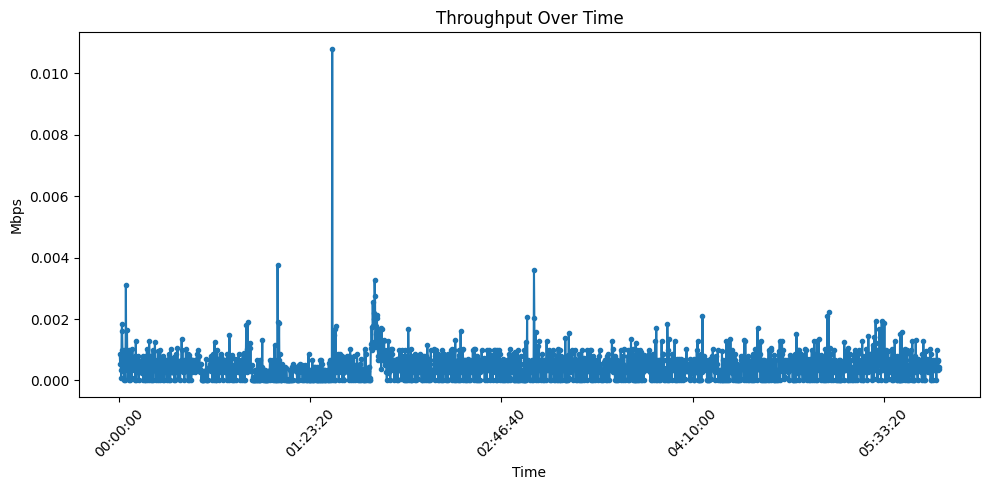

Average Receive Rate: 0.00 Mbps
node12


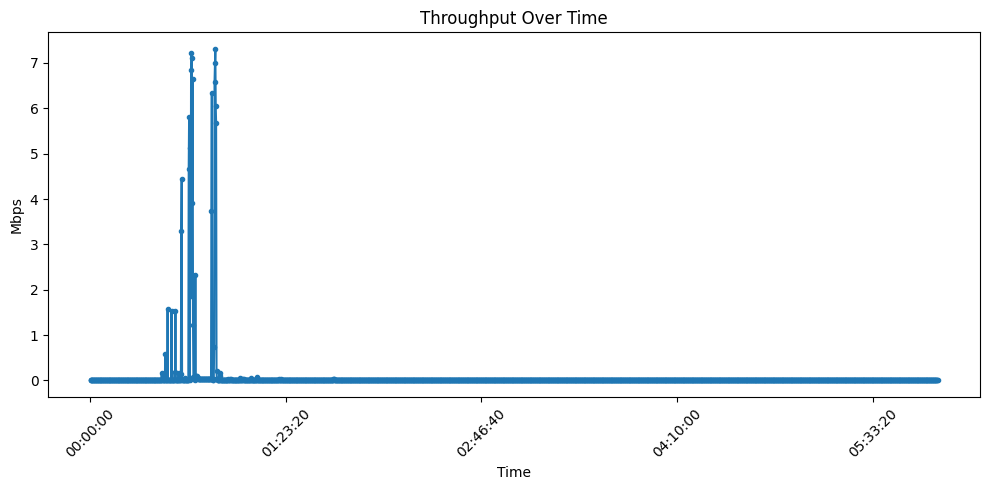

Average Receive Rate: 0.05 Mbps
node13


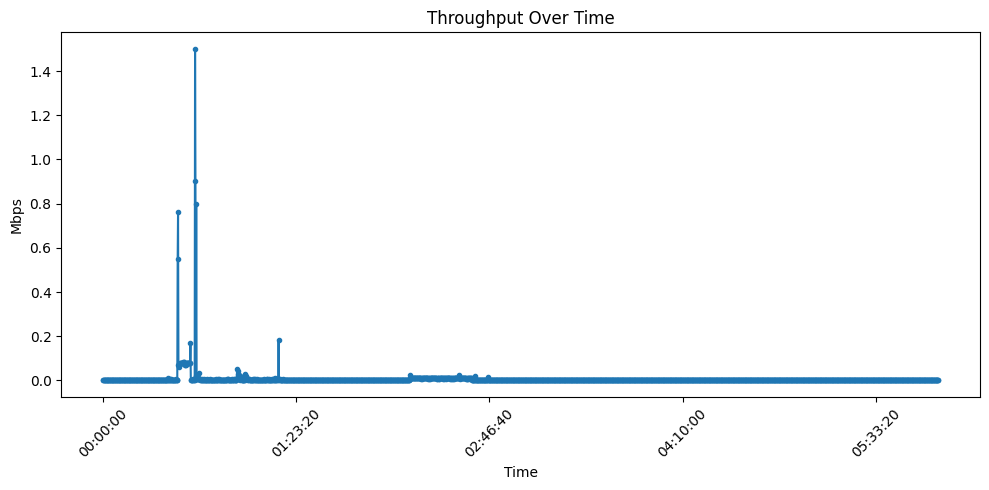

Average Receive Rate: 0.01 Mbps
node14


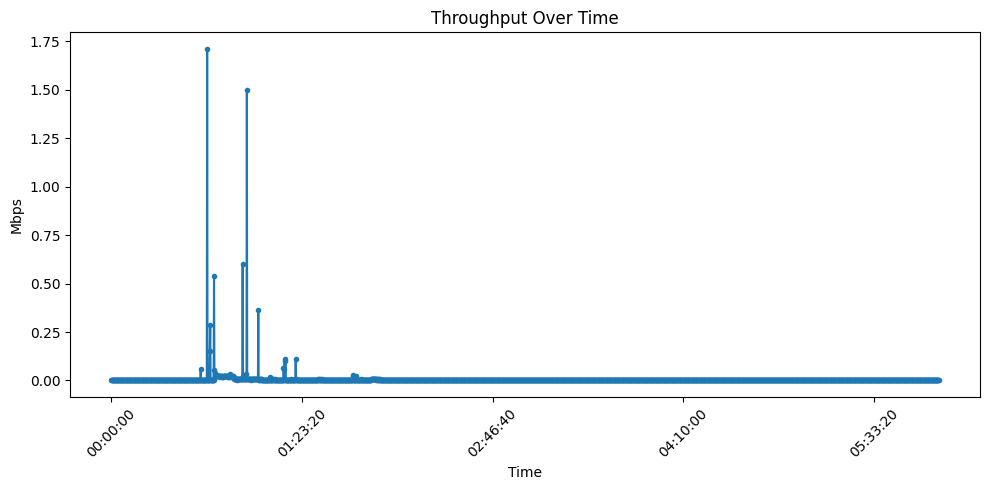

Average Receive Rate: 0.00 Mbps
node15


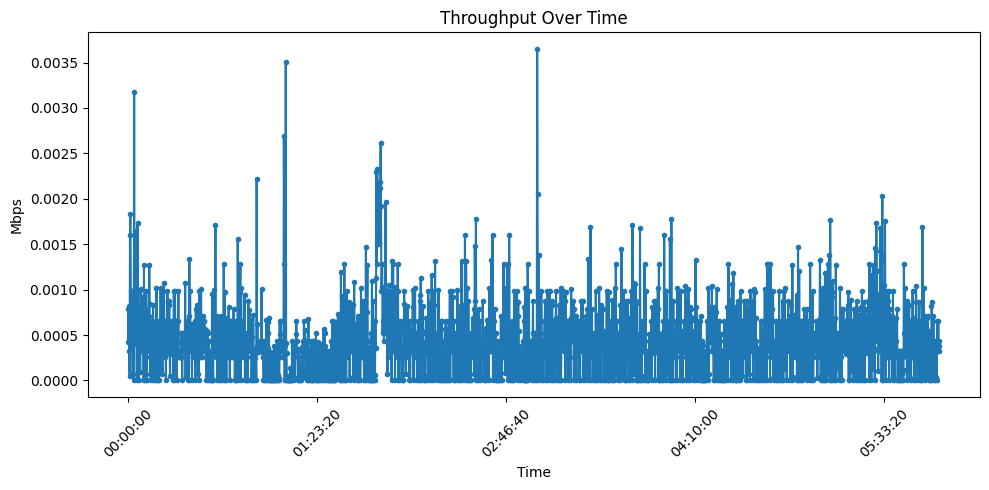

Average Receive Rate: 0.00 Mbps
node16


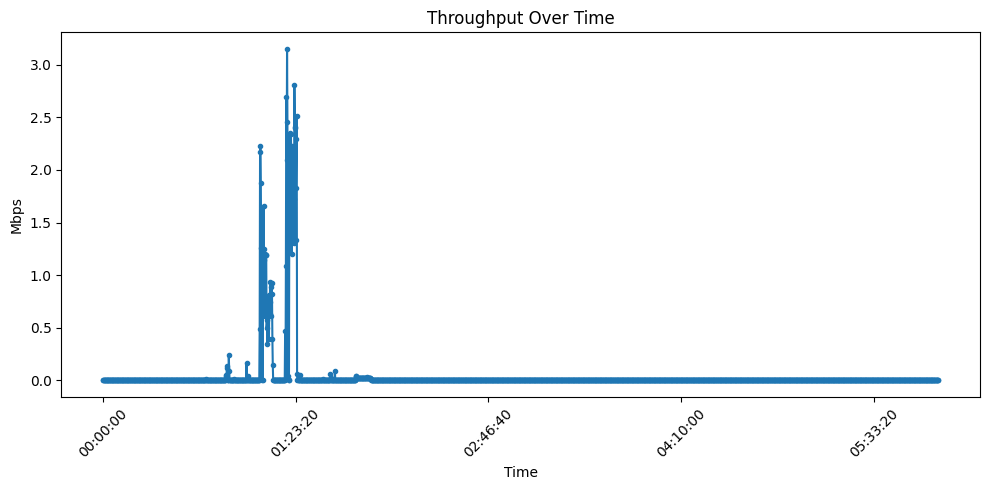

Average Receive Rate: 0.04 Mbps
node17


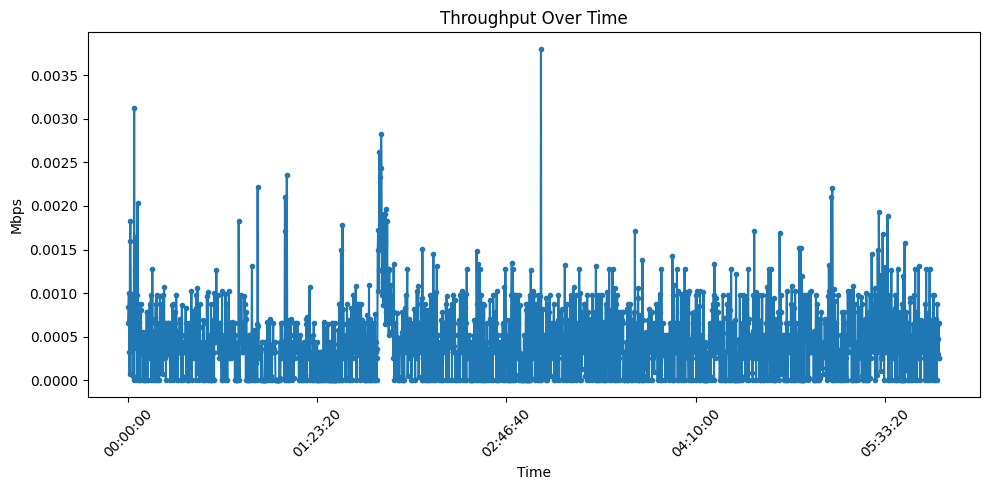

Average Receive Rate: 0.00 Mbps
node18


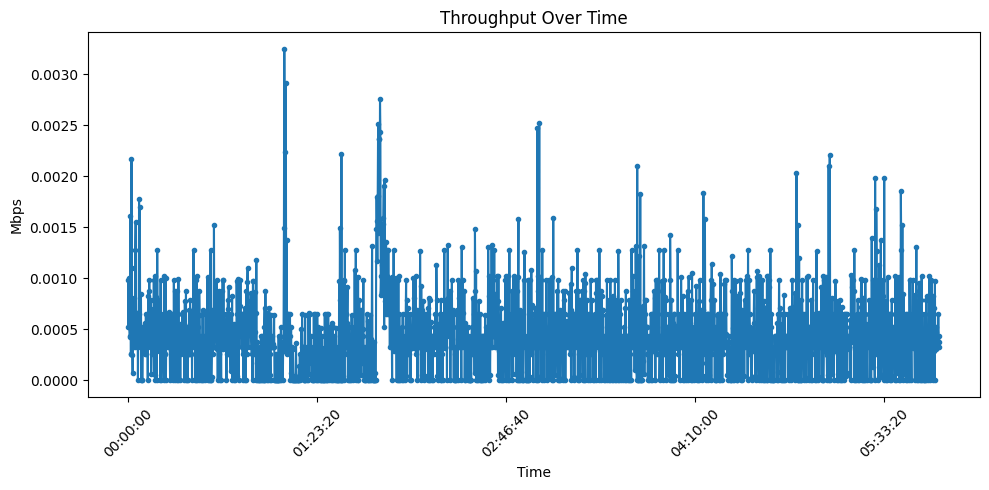

Average Receive Rate: 0.00 Mbps
node19


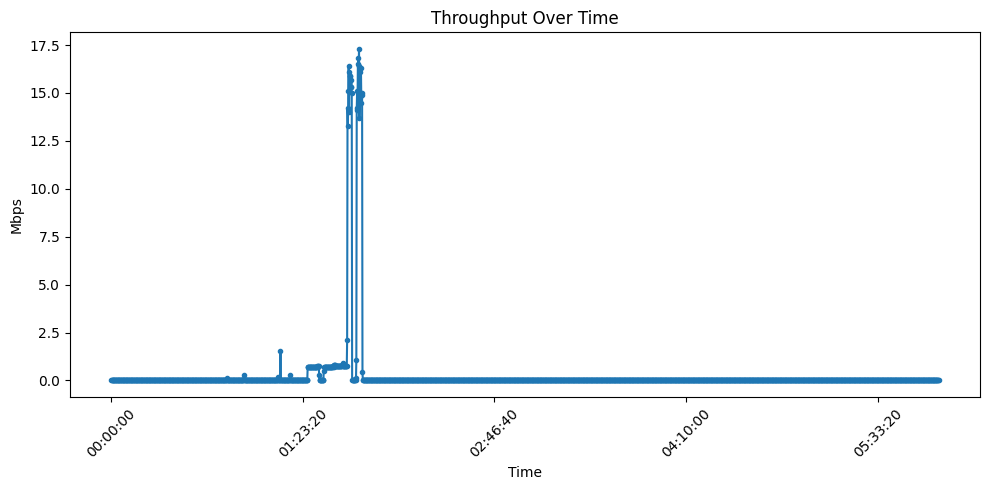

Average Receive Rate: 0.23 Mbps
node2


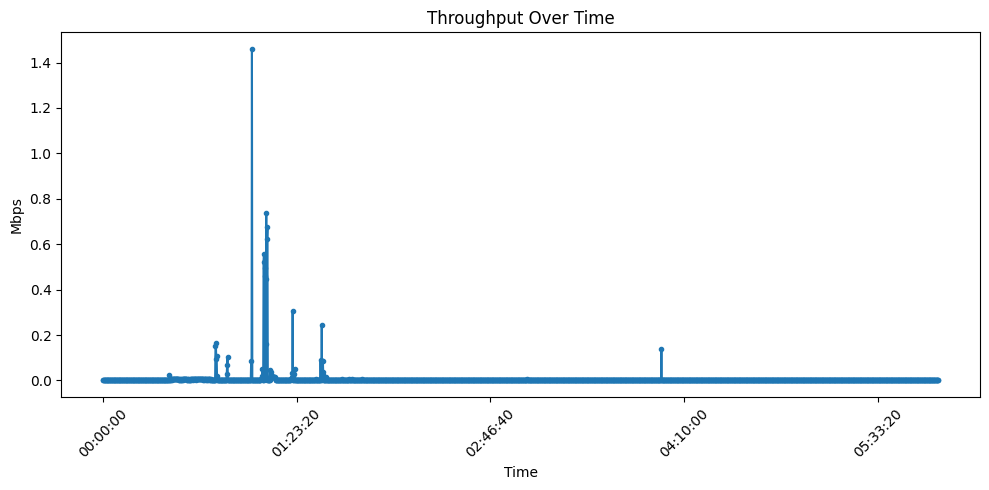

Average Receive Rate: 0.00 Mbps
node20


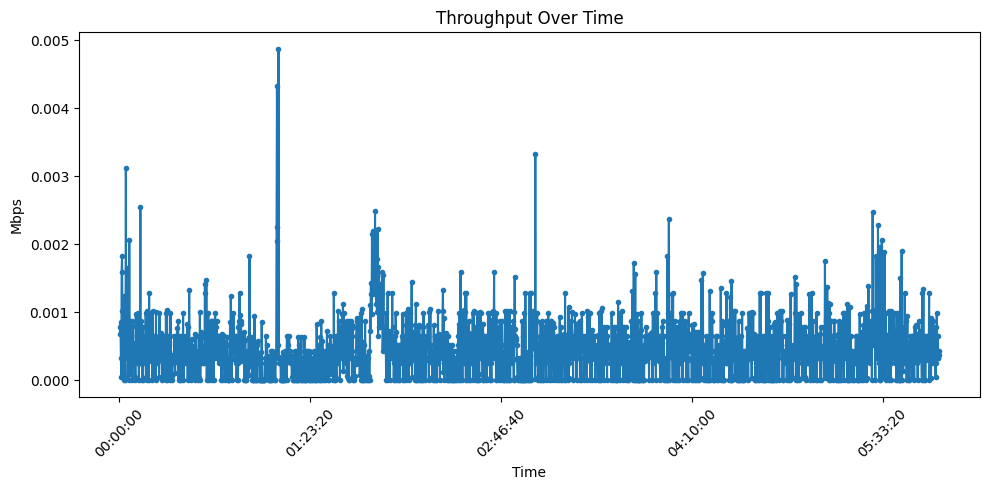

Average Receive Rate: 0.00 Mbps
node21


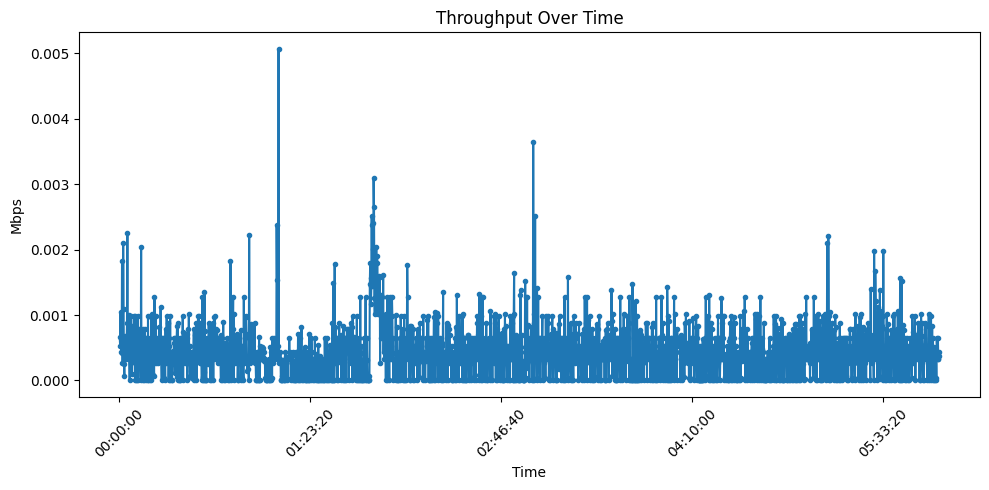

Average Receive Rate: 0.00 Mbps
node22


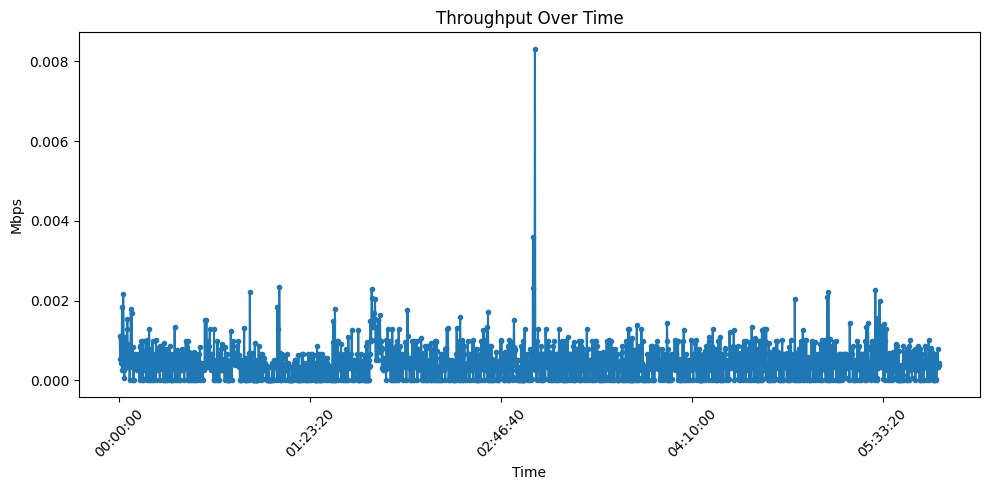

Average Receive Rate: 0.00 Mbps
node23


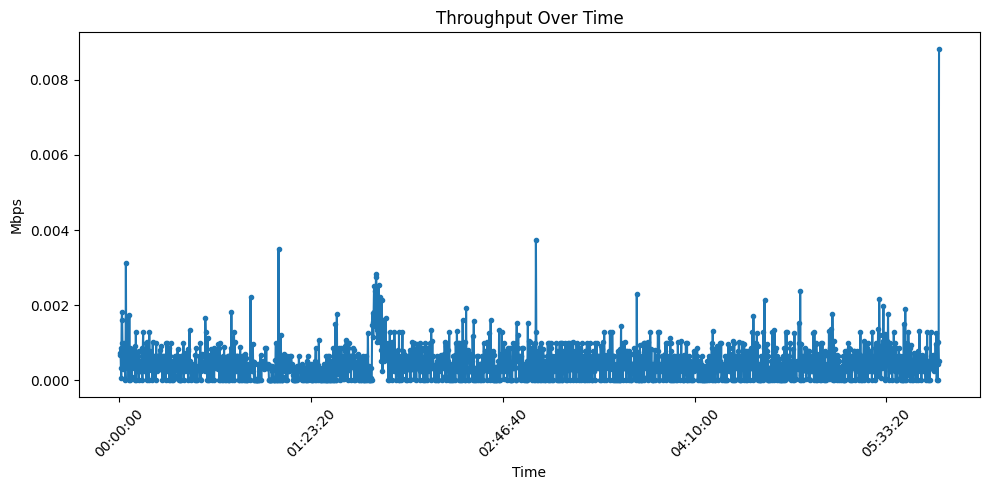

Average Receive Rate: 0.00 Mbps
node24


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/d/RustiFlow/scanning-lab/scanning2/node24/iftop_data.log'

In [25]:
for experiment in ['scanning1', 'scanning2']:
    host_dirs = os.listdir(os.path.join(data_dir, experiment))
    for host in host_dirs:
        print(host)
        plot_throughput_over_time(os.path.join(data_dir, experiment, host, 'iftop_data.log'))
        # host_files = os.listdir(os.path.join(data_dir, experiment, host))
        # for host_file in host_files:
        #     print(host_file)